<a href="https://colab.research.google.com/github/MedeirosMayck/ImersaoDados4/blob/main/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imersão Dados 4

1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

```
# Isto está formatado como código
```



In [ ]:
import pandas as pd


In [ ]:
## Definição de variáveis
UrlDados = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
DadosBrutos = pd.read_csv(UrlDados)

In [ ]:
DadosBrutos.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
DadosBrutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


#Desafio 1

In [ ]:
DadosBM = DadosBrutos[["Bairro","Metragem"]]

In [ ]:
MeanBM = DadosBM.groupby("Bairro").mean()
print(MeanBM)

                     Metragem
Bairro                       
Aclimação          253.056818
Alto da Boa Vista  418.875000
Alto da Lapa       294.337209
Alto da Mooca      270.050000
Alto de Pinheiros  433.444988
...                       ...
Vila Água Funda    152.200000
Água Branca        191.000000
Água Fria          165.416667
Água Funda         139.000000
Água Rasa          340.250000

[701 rows x 1 columns]


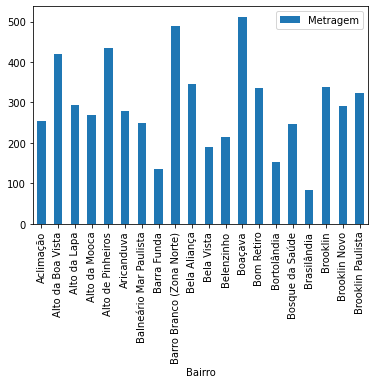

In [ ]:
MeanBM.head(20).plot.bar()

#Desafio 2

In [ ]:
DadosBrutos.groupby("Bairro")

In [ ]:
DadosBrutos.sort_values(by=["Bairro"])

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6201,Rua Oliveira Peixoto,Aclimação,São Paulo,120,3,3,8,R$ 1.250.000
3748,Rua Pais de Andrade,Aclimação,São Paulo,180,3,1,3,R$ 1.200.000
4264,Rua Albina Barbosa,Aclimação,São Paulo,130,2,3,2,R$ 1.100.000
3737,Rua Antero Mendes Leite,Aclimação,São Paulo,234,3,1,2,R$ 1.580.000
2764,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,205,2,1,1,R$ 850.000
...,...,...,...,...,...,...,...,...
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,São Paulo,358,4,6,7,R$ 1.600.000


#Desafio 3

In [ ]:
#Casas por Bairro
DadosCB = DadosBrutos.value_counts(subset="Bairro")
print(DadosCB)

Bairro
Alto de Pinheiros    409
Jardim Guedala       403
Jardim Paulista      309
Brooklin Paulista    247
Jardim Europa        240
                    ... 
Vila Fernandes         1
Vila Fiat Lux          1
Educandário            1
Vila Guaca             1
Jardim Guapira         1
Length: 701, dtype: int64


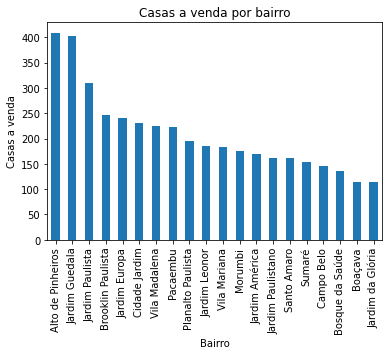

In [ ]:
DadosCB.head(20).plot.bar(ylabel="Casas a venda",title="Casas a venda por bairro")

#Desafio 4

In [ ]:
#Analisando melhor os dados de metragem por bairro
DadosBM.dropna().groupby("Bairro").describe(include = 'all')

Metragem                                                \
                     count        mean         std    min     25%    50%   
Bairro                                                                     
Aclimação             88.0  253.056818  159.140245  104.0  165.00  227.5   
Alto da Boa Vista      8.0  418.875000  111.880596  315.0  347.50  378.0   
Alto da Lapa          86.0  294.337209  187.674036   46.0  151.25  255.0   
Alto da Mooca         20.0  270.050000  237.306924   84.0  133.75  182.5   
Alto de Pinheiros    409.0  433.444988  145.676574  100.0  344.00  412.0   
...                    ...         ...         ...    ...     ...    ...   
Vila Água Funda        5.0  152.200000   44.353128   90.0  138.00  143.0   
Água Branca           13.0  191.000000   91.045776   91.0  143.00  174.0   
Água Fria             12.0  165.416667   82.934211   60.0   76.25  174.5   
Água Funda             2.0  139.000000   19.798990  125.0  132.00  139.0   
Água Rasa              8.0  340.250000  294.046036   86.0  172.50  180.0   

                                   
                      75%     max  
Bairro                             
Aclimação          300.00  1500.0  
Alto da Boa Vista  448.75   595.0  
Alto da Lapa       363.75  1133.0  
Alto da Mooca      221.25   805.0  
Alto de Pinheiros  505.00  1530.0  
...                   ...     ...  
Vila Água Funda    190.00   200.0  
Água Branca        200.00   400.0  
Água Fria          210.50   314.0  
Água Funda         146.00   153.0  
Água Rasa          455.75   805.0  

[701 rows x 8 columns]

#Desafio 5

In [ ]:
# Verificando quantos valores nulos existem no dataframe:
DadosRB = DadosBrutos[["Rua","Bairro"]]
DadosRB.isnull().value_counts()

Rua    Bairro
False  False     6562
True   False     3434
False  True        12
dtype: int64

Existem 3434 bairros sem rua no data frame. Então vamos selecionar somente esses.

In [ ]:
# Selecionando Bairros com valores nulos
RuaNula = DadosRB[DadosRB["Rua"].isna()]
print(RuaNula)

      Rua                            Bairro
3     NaN                    Jardim Morumbi
11    NaN                  Jardim Luzitânia
31    NaN                    Parque da Lapa
56    NaN  Chácara Santo Antônio (Zona Sul)
57    NaN                    Jardim Guedala
...   ...                               ...
9963  NaN                 Jardim Petrópolis
9989  NaN              Parque Alves de Lima
9991  NaN                      Vila Formosa
9995  NaN                     Jardim Leonor
9999  NaN                 Jardim Petrópolis

[3434 rows x 2 columns]


In [ ]:
RuaNula.groupby("Bairro").any()

,Rua
Bairro,
Aclimação,False
Alto da Boa Vista,False
Alto da Lapa,False
Alto da Mooca,False
Alto de Pinheiros,False
...,...
Vila do Encontro,False
Água Branca,False
Água Fria,False
